In [9]:
!pip install plotly

    100% |████████████████████████████████| 41.2MB 685kB/s eta 0:00:01  4% |█▍                              | 1.9MB 21.1MB/s eta 0:00:02    24% |███████▉                        | 10.1MB 34.7MB/s eta 0:00:01    77% |████████████████████████▋       | 31.7MB 30.1MB/s eta 0:00:01
  Stored in directory: /Users/l/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

tls.set_credentials_file(username='lukefreeman42', api_key='F7rzszeAWC1rd1KdA37y')


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load Cleaned Datasets

In [3]:
df = pd.read_csv('./custom_csvs/Death_%_population_perCountry.csv')
df = df.drop('Unnamed: 0', axis=1)

df = df.drop([65,21]) #ussr, french-indo
df = df.reset_index(drop=True)

test = df.loc[range(1,60)]

# Visualizations

In [4]:
data = [go.Choropleth(
    autocolorscale = True,
    locations = df['Country'],
    z = df['Min'].astype(float),
    locationmode = 'country names',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(0,0,0)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Total Killed")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'WW2 Killed total per country'
    ),
    geo = go.layout.Geo(
        scope = "world",
        projection = go.layout.geo.Projection(type = 'natural earth')
    )
)
#natural earth

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~lukefreeman42/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [5]:
data = [go.Choropleth(
    autocolorscale = True,
    locations = df['Country'],
    z = df['% Min'].astype(float),
    locationmode = 'country names',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(0,0,0)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Percentage of Population")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'WW2 Casualties based on percentage of total population'
    ),
    geo = go.layout.Geo(
        scope = "world",
        projection = go.layout.geo.Projection(type = 'natural earth')
    )
)
#natural earth

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~lukefreeman42/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [6]:
df_HLBC = pd.read_csv('./clean_csvs/Human_losses_by_country_CLEAN.csv')
df_HLBC = df_HLBC.drop('Unnamed: 0', axis=1)

In [31]:
df_HLBC.loc[64] = df_HLBC.loc[17][1:] + df_HLBC.loc[58][1:] + df_HLBC.loc[59][1:]
df_HLBC.loc[64, ['Country']] = 'U.S, France, U.K. (Allies excluding Soviet Union)'

df_HLBC.loc[65] = df_HLBC.loc[8][1:] + df_HLBC.loc[29][1:]
df_HLBC.loc[65, ['Country']] = 'China, Japan (Pacific War)'

df_HLBC.loc[66] = df_HLBC.loc[19][1:] + df_HLBC.loc[28][1:]
df_HLBC.loc[66, ['Country']] = 'Germany, Italy, Austria (Axis excluding Japan)'

df_HLBC.loc[63] = df_HLBC.loc[62][1:] - df_HLBC.loc[52][1:] - df_HLBC.loc[64][1:] - df_HLBC.loc[65][1:] - df_HLBC.loc[66][1:]
df_HLBC.loc[63, ['Country']] = 'All other countries'

df_HLBC.loc[67] = df_HLBC.loc[62][1:] - df_HLBC.loc[65][1:]

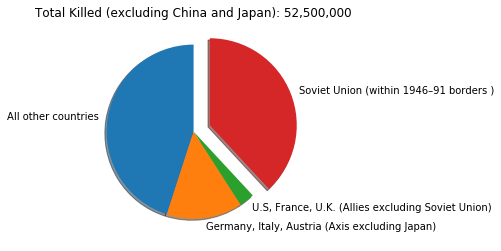

In [38]:
names = [df_HLBC.loc[63]['Country'], df_HLBC.loc[66]['Country'], df_HLBC.loc[64]['Country'], df_HLBC.loc[52]['Country']]
values = [df_HLBC.loc[63]['Totaldeaths_min'], df_HLBC.loc[66]['Totaldeaths_min'],  df_HLBC.loc[64]['Totaldeaths_min'], df_HLBC.loc[52]['Totaldeaths_min']]
explode = (0, 0, 0, 0.2)

plt.title('Total Killed (excluding China and Japan): 52,500,000')
plt.pie(x=values, labels=names, explode=explode,startangle=90, shadow=True);